In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [28]:
from pyHalo.preset_models import WDM, CDM

zlens, zsource = 0.5, 2.5

mixed_DM_frac = 0.4
log_m_half = 8.0
mass_function_turnover_model = 'MIXED_DM'
kwargs_mixed_DM = {'mass_function_turnover_model': mass_function_turnover_model, 
                  'mixed_DM_frac': mixed_DM_frac, 
                  'log_mc': log_m_half, 'a_wdm': 1.0, 'b_wdm': 1.0, 'c_wdm': -2.5}
realization_mixedDM = WDM(zlens, zsource, cone_opening_angle_arcsec=10, **kwargs_mixed_DM)


kwargs_WDM = {'log_mc': log_m_half, 'a_wdm': 1.0, 'b_wdm': 1.0, 'c_wdm': -2.5}
realizationCDM = CDM(zlens, zsource, cone_opening_angle_arcsec=10)
realizationWDM = WDM(zlens, zsource, cone_opening_angle_arcsec=10, **kwargs_WDM)

pure WDM realization contains 196 halos.
mixed realization contains 3434 halos.
CDM realization contains 19422 halos.


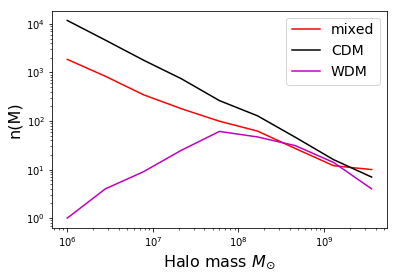

In [29]:
print('pure WDM realization contains '+str(len(realizationWDM.halos))+' halos.')
print('mixed realization contains '+str(len(realization_mixedDM.halos))+' halos.')
print('CDM realization contains '+str(len(realizationCDM.halos))+' halos.')

halo_masses = [halo.mass for halo in realization_mixedDM.halos]
halo_masses_cdm = [halo.mass for halo in realizationCDM.halos]
halo_masses_wdm = [halo.mass for halo in realizationWDM.halos]
N_mixedDM, m = np.histogram(halo_masses, bins=np.logspace(6, 10, 10))
Ncdm, mcdm = np.histogram(halo_masses_cdm, bins=np.logspace(6, 10, 10))
Nwdm, mwdm = np.histogram(halo_masses_wdm, bins=np.logspace(6, 10, 10))

plt.loglog(m[0:-1], N_mixedDM, color='r', label='mixed')
plt.loglog(mcdm[0:-1], Ncdm, color='k', label='CDM')
plt.loglog(mwdm[0:-1], Nwdm, color='m', label='WDM')
plt.xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
plt.ylabel('n(M)', fontsize=16)
plt.legend(fontsize=14)